In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import importlib
from PIL import Image
import pickle as pkl
import json
import gseapy as gp
import matplotlib.pyplot as plt
from gseapy import barplot, dotplot


In [14]:
os.chdir('/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/gsea_region_w_specialST')
figdir = 'fig'

## Same sample cross regions

In [103]:
gsea_dir = '/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/gsea_region_w_specialST'

for d in ['Fresh', 'Slow', 'Vitri']:
    d_dir = f'{gsea_dir}/{d}'
    reses = {}
    files = [f for f in os.listdir(f'{gsea_dir}/{d}') if f.endswith('.pkl')]
    for file in files:
        res = pkl.load(open(f'{gsea_dir}/{d}/{file}', 'rb')).res2d
        key = file.split('_')[0]
        res['comparison'] = key
        print(key)
        posres = res[res['NES']>0]
        posres = posres[~posres.Term.str.startswith('KEGG')]  # remove KEGG pathways 
        posres['Term'] = posres['Term'].values
        posres['Term'] = posres['Term'].str.split('__').str[1]
        posres['Term'] = posres['Term'].str.split('\(GO').str[0]
        posres['Term'] = posres['Term'].str.split(' R-').str[0]
        print(posres.shape)
        reses[key] = posres
    total_results = pd.concat(reses.values())
    print(total_results.comparison.value_counts())
    total_results = total_results.drop_duplicates()
    total_results.to_csv(f'{gsea_dir}/{d}_total_results.csv', index=False)


None
(1725, 11)
medulla
(1600, 11)


cortex
(1199, 11)
mid-cortex
(3628, 11)
comparison
mid-cortex    3628
None          1725
medulla       1600
cortex        1199
Name: count, dtype: int64
medulla
(399, 11)
cortex
(2753, 11)
mid-cortex
(3535, 11)
comparison
mid-cortex    3535
cortex        2753
medulla        399
Name: count, dtype: int64
medulla
(457, 11)
cortex
(2640, 11)
mid-cortex
(3618, 11)
comparison
mid-cortex    3618
cortex        2640
medulla        457
Name: count, dtype: int64


/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


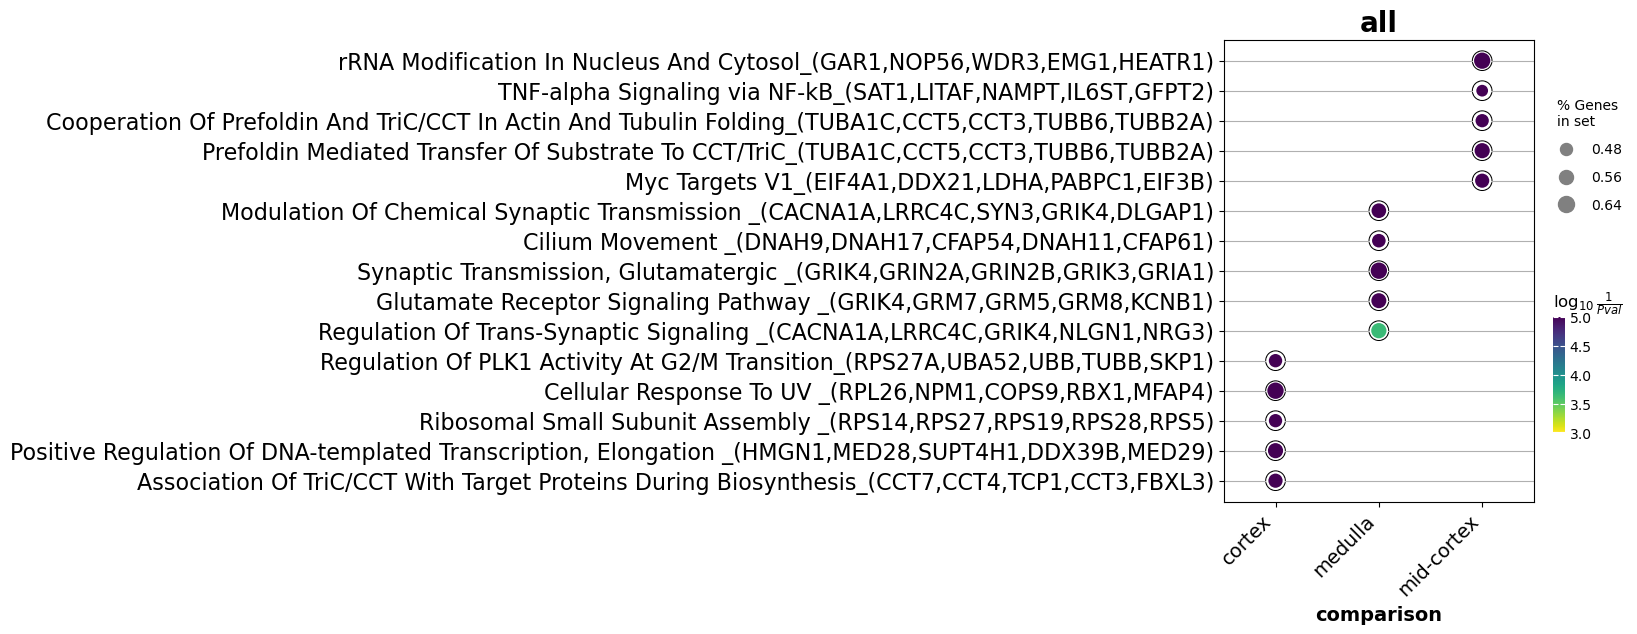

In [4]:
gsea_dir = '/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/gsea_region_w_specialST'
comp = 'all'
total_results = pd.read_csv(f'{gsea_dir}/{comp}_total_results.csv')
total_results = total_results[~total_results['Term'].str.contains('Viral|Disease|Defective|HIV')]
lgs = [','.join(x.split(';')[:5]) for x in total_results['Lead_genes']]
total_results['Term'] = [f'{x}_({lgs[i]})' for i,x in enumerate(total_results['Term'])]

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=5,
            figsize=(5,6),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            marker='o', 
            title=comp,
            # ofname=f'{figdir}/gseapy_dotplot_cross_sample.pdf'
            )

/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


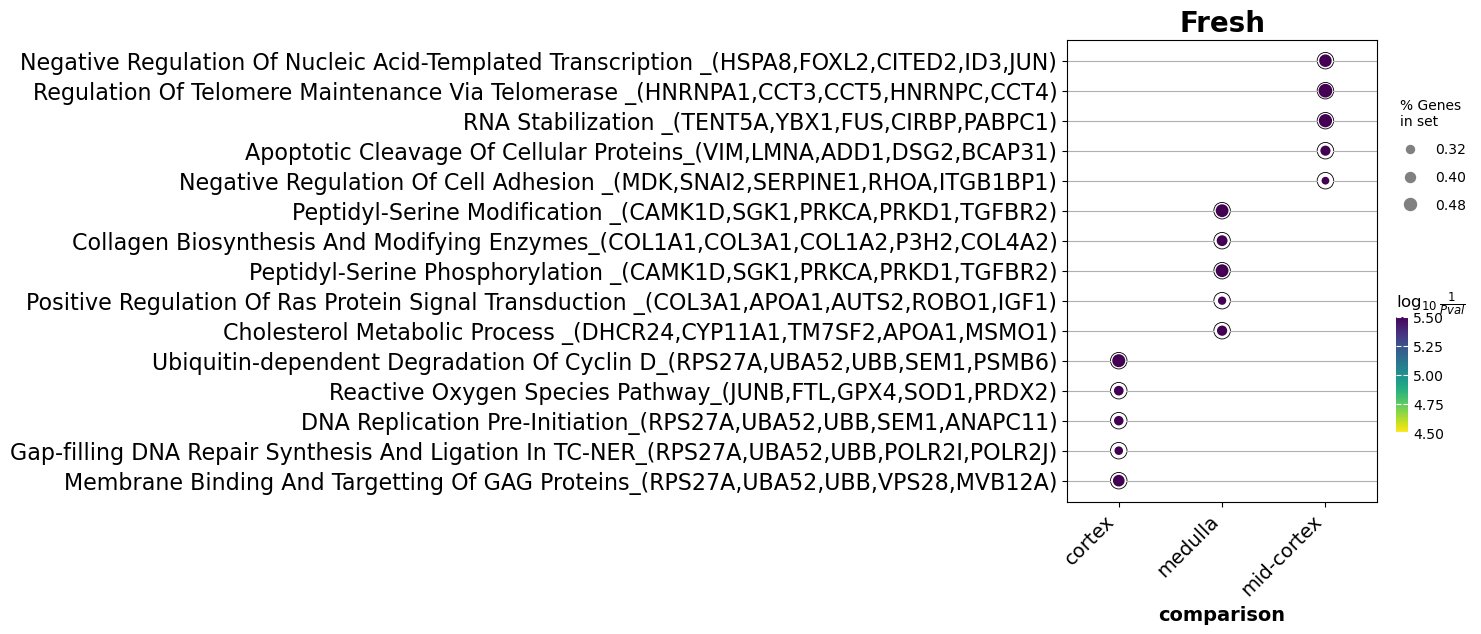

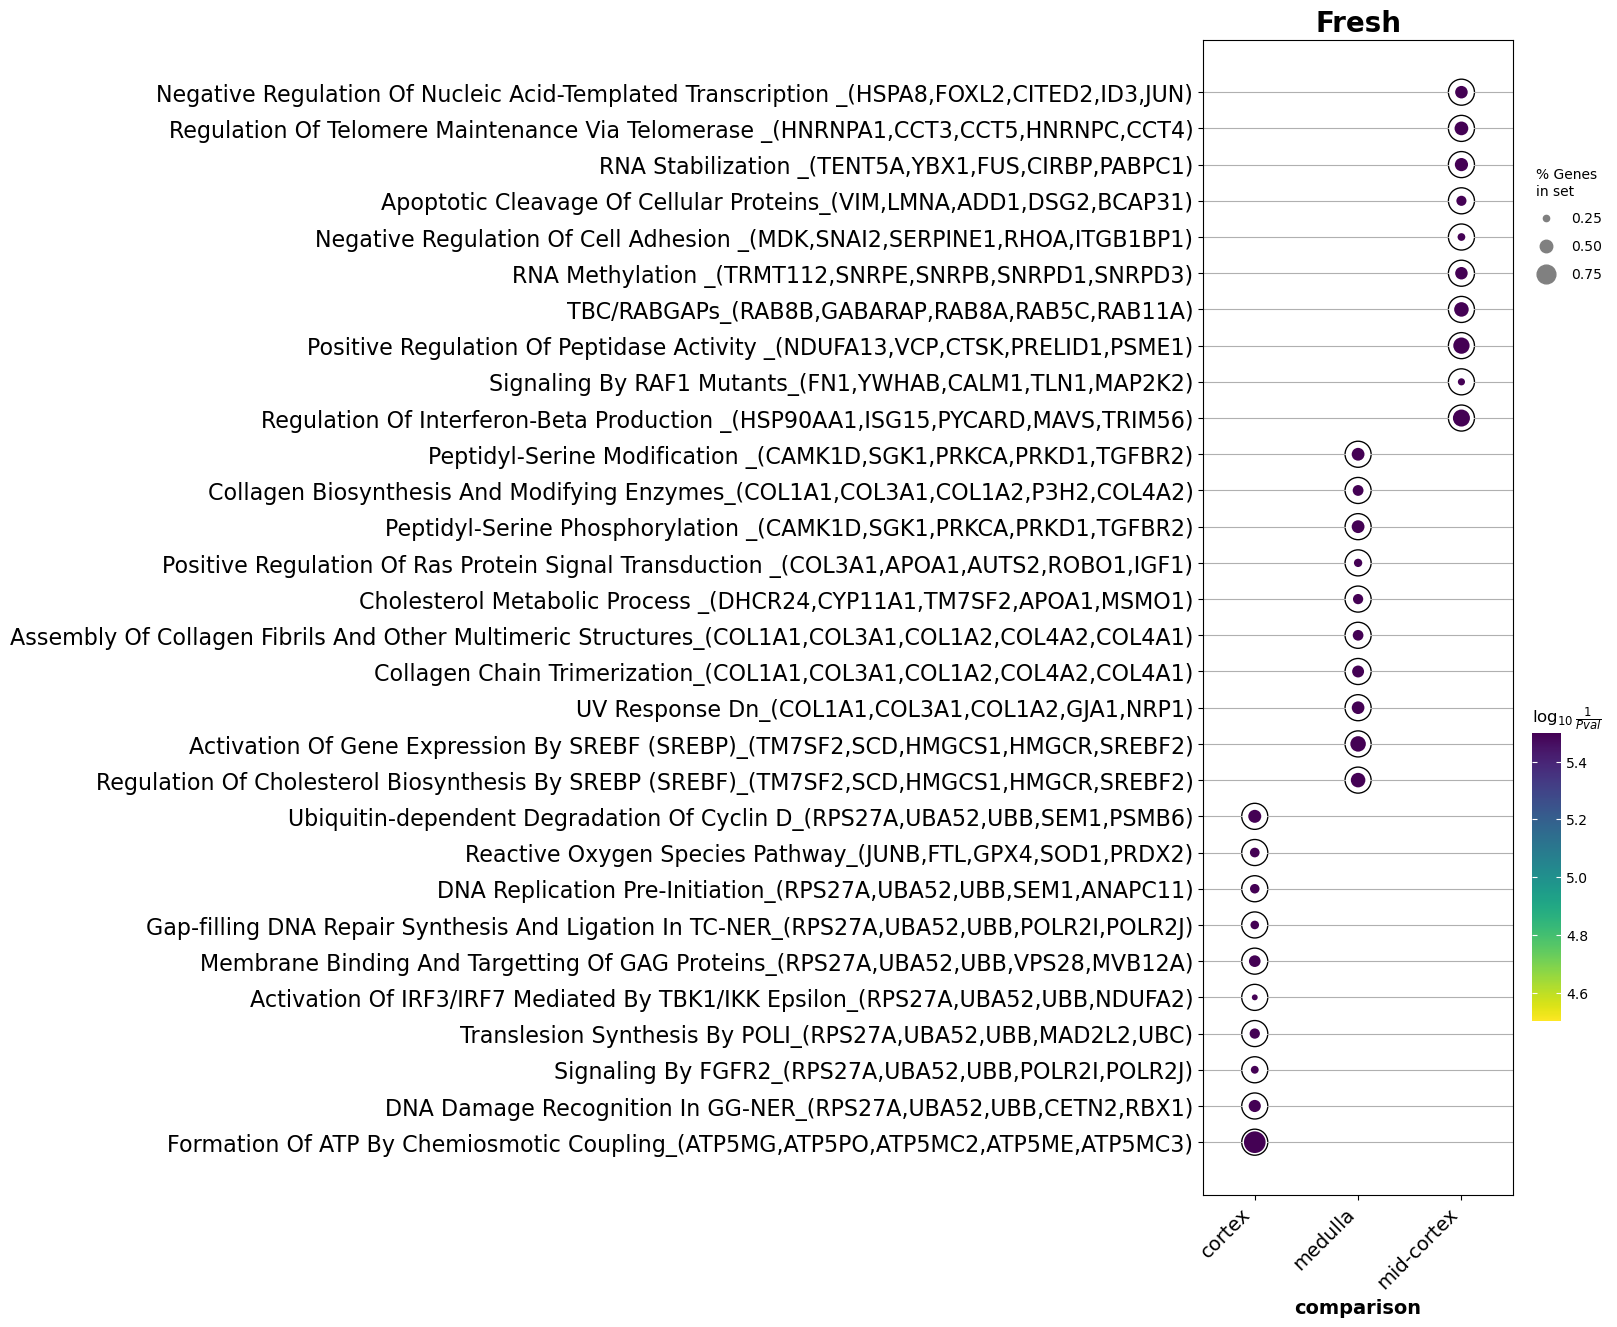

In [5]:
comp = 'Fresh'
total_results = pd.read_csv(f'{gsea_dir}/{comp}_total_results.csv')
total_results = total_results[~total_results['Term'].str.contains('Viral|Disease|Defective|HIV')]
lgs = [','.join(x.split(';')[:5]) for x in total_results['Lead_genes']]
total_results['Term'] = [f'{x}_({lgs[i]})' for i,x in enumerate(total_results['Term'])]

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=5,
            figsize=(5,6),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            marker='o', 
            title=comp,
            # ofname=f'{figdir}/gseapy_dotplot_cross_sample.pdf'
            )

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=10,
            figsize=(5,15),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            title=comp,
            marker='o', 
            # ofname=f'{figdir}/gseapy_dotplot_cross_sample.pdf'
            )


/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


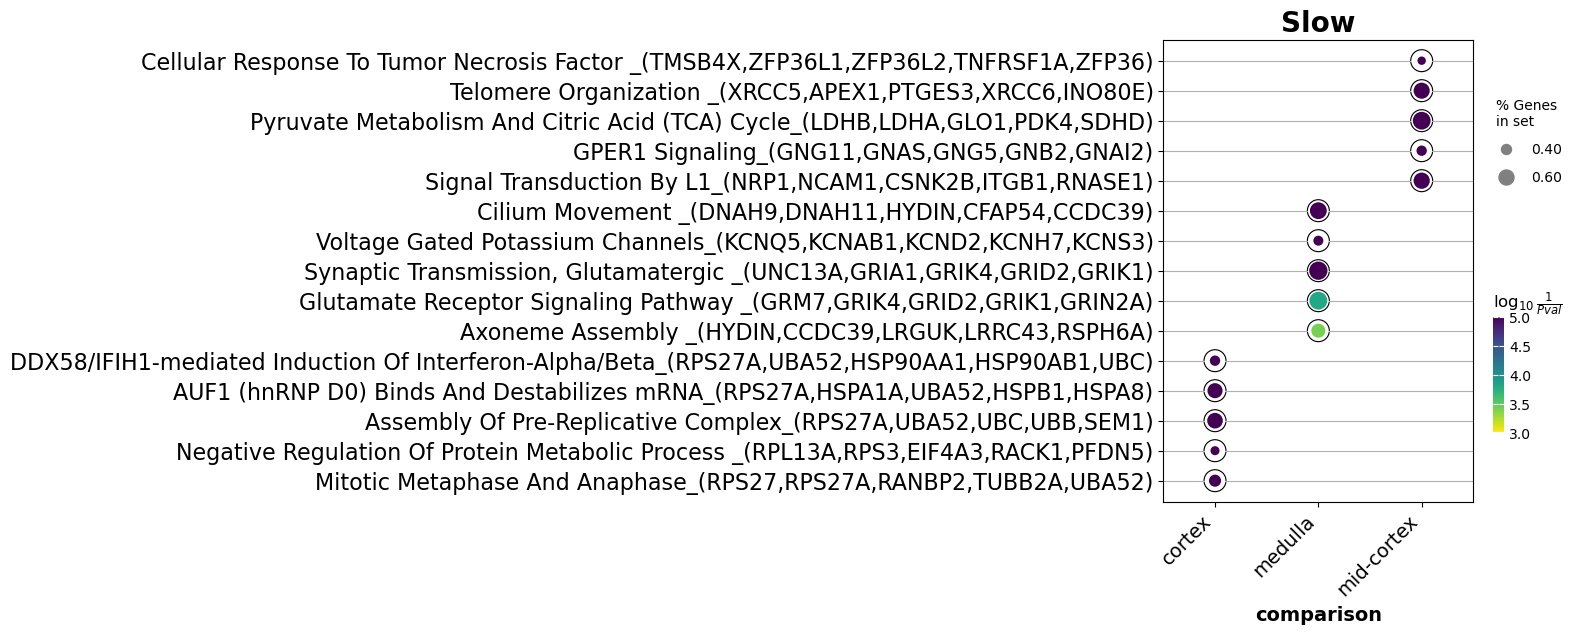

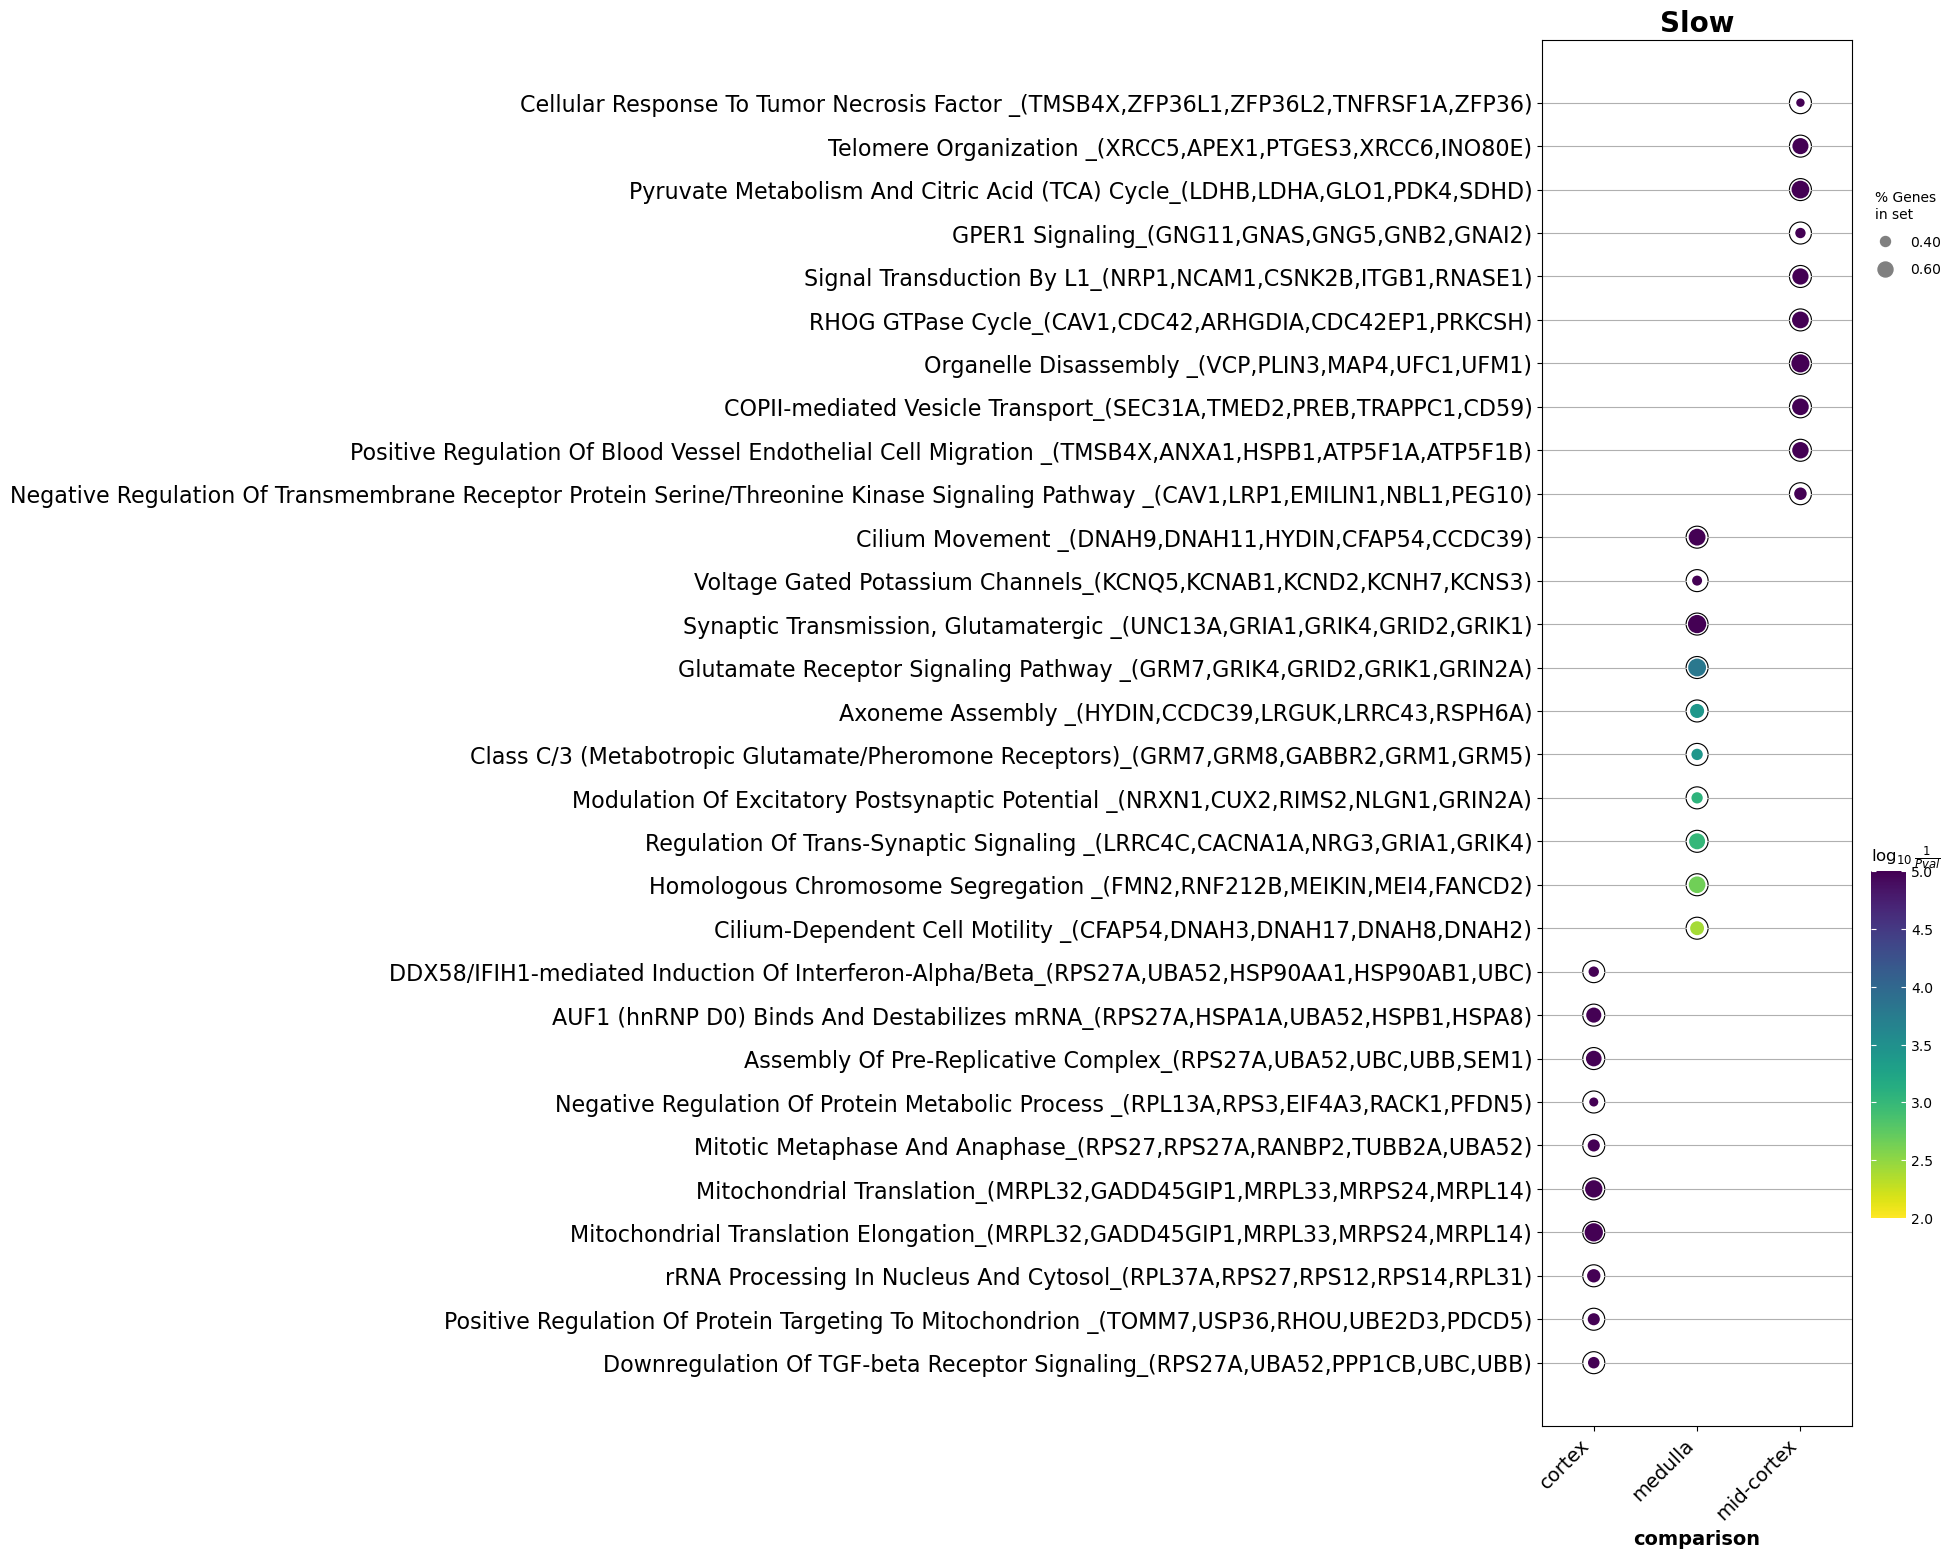

In [108]:
comp = 'Slow'
total_results = pd.read_csv(f'{gsea_dir}/{comp}_total_results.csv')
total_results = total_results[~total_results['Term'].str.contains('Viral|Disease|Defective|HIV')]
lgs = [','.join(x.split(';')[:5]) for x in total_results['Lead_genes']]
total_results['Term'] = [f'{x}_({lgs[i]})' for i,x in enumerate(total_results['Term'])]

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=5,
            figsize=(5,6),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            title=comp,
            marker='o', 
            # ofname=f'{figdir}/gseapy_dotplot_cross_sample.pdf'
            )

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=10,
            figsize=(5,18),
            xticklabels_rot=45, # rotate xtick labels
            title=comp,
            show_ring=True, # set to False to revmove outer ring
            marker='o', 
            # ofname=f'{figdir}/gseapy_dotplot_cross_sample.pdf'
            )


/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


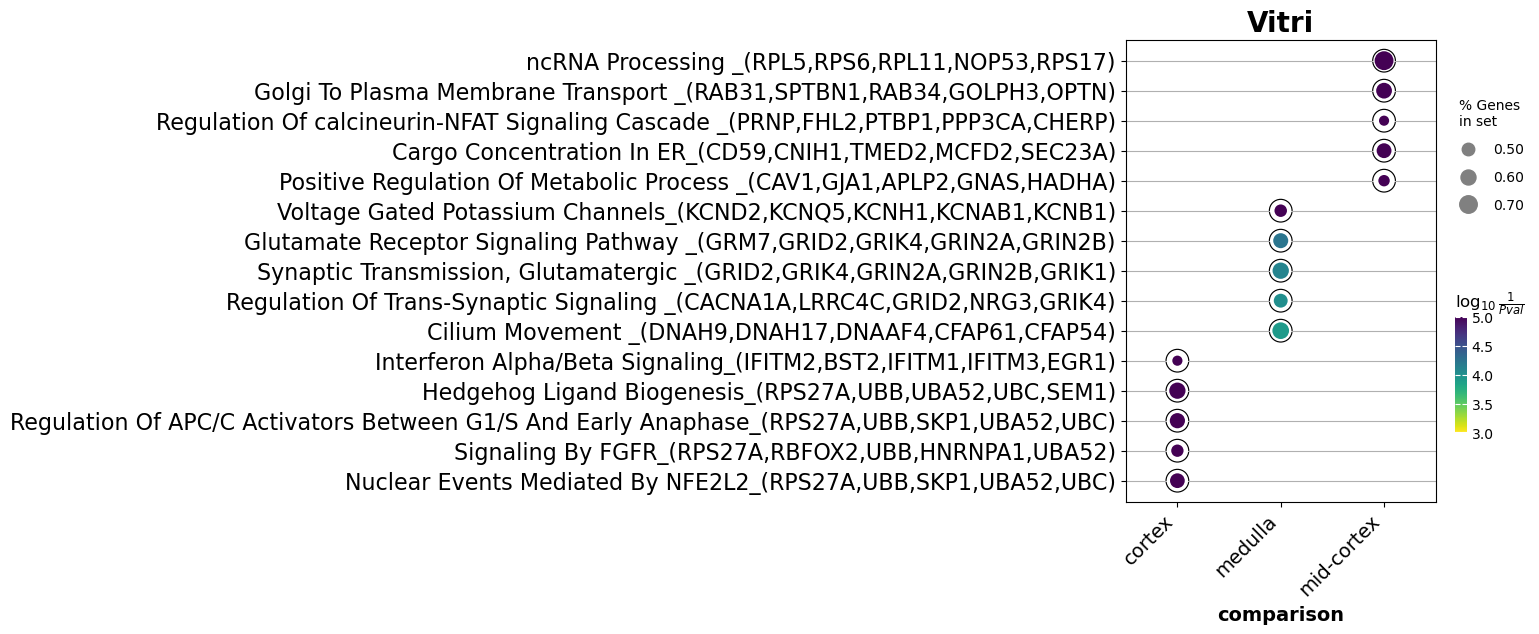

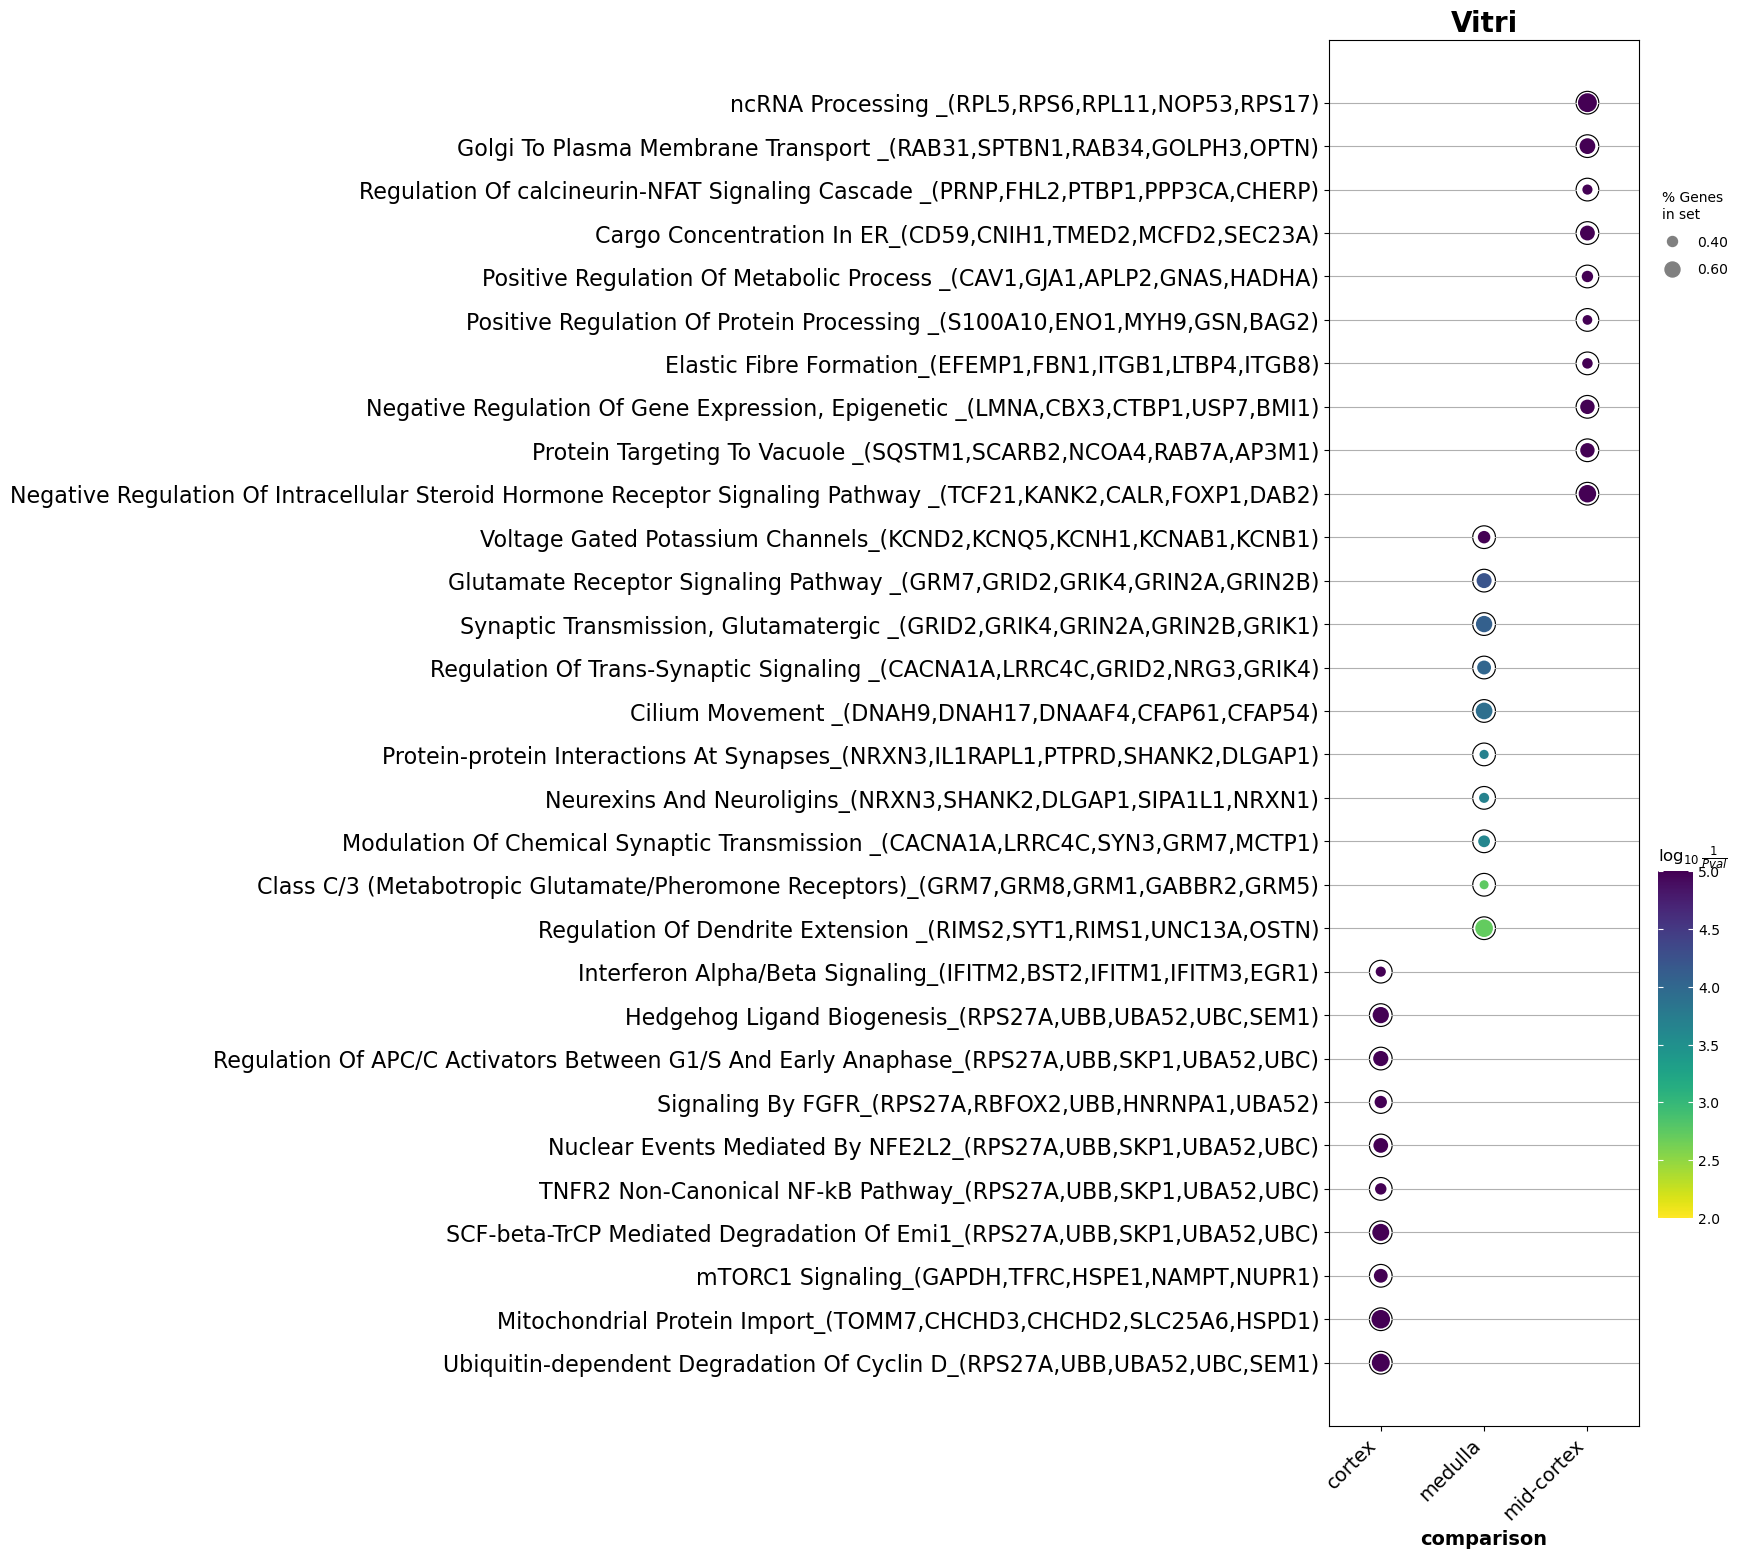

In [134]:
comp = 'Vitri'
total_results = pd.read_csv(f'{gsea_dir}/{comp}_total_results.csv')
total_results = total_results[~total_results['Term'].str.contains('Viral|Disease|Defective|HIV|Host')]
lgs = [','.join(x.split(';')[:5]) for x in total_results['Lead_genes']]
total_results['Term'] = [f'{x}_({lgs[i]})' for i,x in enumerate(total_results['Term'])]

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=5,
            figsize=(5,6),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            title=comp,
            marker='o', 
            # ofname=f'{figdir}/gseapy_dotplot_cross_sample.pdf'
            )

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=10,
            figsize=(5,18),
            xticklabels_rot=45, # rotate xtick labels
            title=comp,
            show_ring=True, # set to False to revmove outer ring
            marker='o', 
            # ofname=f'{figdir}/gseapy_dotplot_cross_sample.pdf'
            )


## Same region cross samples

In [128]:
gsea_dir = '/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/gsea_region_w_specialST'

for d in ['medulla', 'mid-cortex', 'cortex']:
    d_dir = f'{gsea_dir}/{d}'
    reses = {}
    files = [f for f in os.listdir(f'{gsea_dir}/{d}') if f.endswith('.pkl')]
    for file in files:
        res = pkl.load(open(f'{gsea_dir}/{d}/{file}', 'rb')).res2d
        key = file.split('_')[0]
        res['comparison'] = key
        print(key)
        posres = res[res['NES']>0]
        posres = posres[~posres.Term.str.startswith('KEGG')]  # remove KEGG pathways 
        posres['Term'] = posres['Term'].values
        posres['Term'] = posres['Term'].str.split('__').str[1]
        posres['Term'] = posres['Term'].str.split('\(GO').str[0]
        posres['Term'] = posres['Term'].str.split(' R-').str[0]
        print(posres.shape)
        reses[key] = posres
    total_results = pd.concat(reses.values())
    print(total_results.comparison.value_counts())
    total_results = total_results.drop_duplicates()
    total_results.to_csv(f'{gsea_dir}/{d}_total_results.csv', index=False)


Fresh
(3676, 11)
Vitri
(100, 11)
Slow
(229, 11)
comparison
Fresh    3676
Slow      229
Vitri     100
Name: count, dtype: int64
Fresh
(855, 11)
Vitri
(539, 11)
Slow
(1068, 11)
comparison
Slow     1068
Fresh     855
Vitri     539
Name: count, dtype: int64
Fresh
(2847, 11)
Vitri
(736, 11)
Slow
(1662, 11)
comparison
Fresh    2847
Slow     1662
Vitri     736
Name: count, dtype: int64


In [16]:
gsea_dir = '/home/chrissy1/spatial/stomics/ovary_froz/redo/seurat/bin50_processed/gsea_region_w_specialST'
comp = 'medulla'
total_results = pd.read_csv(f'{gsea_dir}/{comp}_total_results.csv')
total_results = total_results[~total_results['Term'].str.contains('Viral|Disease|Defective|HIV|Immune')].sort_values('FDR q-val')
lgs = [','.join(x.split(';')[:10]) for x in total_results['Lead_genes']]
total_results['lg_str'] = lgs
total_results = total_results.drop_duplicates('lg_str')
lgs = [','.join(x.split(';')[:5]) for x in total_results['Lead_genes']]
total_results['Term'] = [f'{x}_({lgs[i]})' for i,x in enumerate(total_results['Term'])]
total_results = total_results[total_results['FDR q-val']<0.05]

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=5,
            figsize=(3,6),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            title=comp,
            marker='o', 
            ofname=f'{figdir}/gseapy_dotplot_{comp}_cross_sample_top5.svg'
            )

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=10,
            figsize=(3,18),
            title=comp,
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            marker='o', 
            ofname=f'{figdir}/gseapy_dotplot_{comp}_cross_sample_top10.svg'
            )


/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [17]:
comp = 'cortex'
total_results = pd.read_csv(f'{gsea_dir}/{comp}_total_results.csv')
total_results = total_results[~total_results['Term'].str.contains('Viral|Disease|Defective|HIV|Immune')].sort_values('FDR q-val')
lgs = [','.join(x.split(';')[:5]) for x in total_results['Lead_genes']]
total_results['lg_str'] = lgs
total_results = total_results.drop_duplicates('lg_str')
total_results['Term'] = [f'{x}_({lgs[i]})' for i,x in enumerate(total_results['Term'])]
total_results = total_results[total_results['FDR q-val']<0.05]

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=5,
            figsize=(3,6),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            title=comp,
            marker='o', 
            ofname=f'{figdir}/gseapy_dotplot_{comp}_cross_sample_top5.svg'
            )

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=10,
            figsize=(10,10),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            title=comp,
            marker='o', 
            ofname=f'{figdir}/gseapy_dotplot_{comp}_cross_sample_top10.svg'
            )


/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [18]:
comp = 'mid-cortex'
total_results = pd.read_csv(f'{gsea_dir}/{comp}_total_results.csv')
total_results = total_results[~total_results['Term'].str.contains('Viral|Disease|Defective|HIV|Immune')].sort_values('FDR q-val')
lgs = [','.join(x.split(';')[:5]) for x in total_results['Lead_genes']]
total_results['lg_str'] = lgs
total_results = total_results.drop_duplicates('lg_str')
total_results['Term'] = [f'{x}_({lgs[i]})' for i,x in enumerate(total_results['Term'])]
total_results = total_results[total_results['FDR q-val']<0.05]

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=5,
            figsize=(3,6),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            marker='o', 
            title=comp,
            ofname=f'{figdir}/gseapy_dotplot_{comp}_cross_sample_top5.svg'
            )

ax = dotplot(total_results,
            column="FDR q-val",
            x='comparison', # set x axis, so you could do a multi-sample/library comparsion
            size=3,
            top_term=10,
            figsize=(5,12),
            xticklabels_rot=45, # rotate xtick labels
            show_ring=True, # set to False to revmove outer ring
            title=comp,
            marker='o', 
            ofname=f'{figdir}/gseapy_dotplot_{comp}_cross_sample_top10.svg'
            )


/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/chrissy1/.conda/envs/scanpy_env/lib/python3.9/site-packages/gseapy/plot.py:602: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
